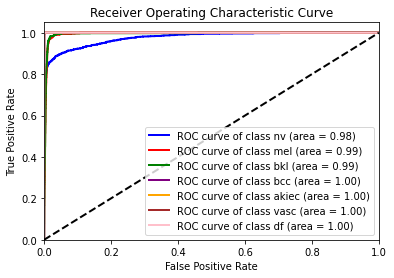

In [6]:
import pickle
import numpy as np
with open("pi.dat", "rb") as f:
    t=pickle.load(f)
    y_test, _,y_pred=t[0],t[1],t[2]

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test contains the true labels for 1000 images
# y_pred contains the predicted probabilities for each of the 7 classes
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']
cl = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(cl[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

